# Proyek Analisis Data: Bike Sharing Demand
- **Nama:** Muhammad Abdurrahman
- **Email:** artmanztull@gmail.com
- **ID Dicoding:** Muhammad Abdurrahman

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?
- Pertanyaan 2 : Bagaimana tren penggunaan sepeda dari waktu ke waktu?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
# Load datasets
day_data = pd.read_csv('day.csv')
hour_data = pd.read_csv('hour.csv')

# Display the first few rows of the datasets
day_data.head(), hour_data.head()

(   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
 0        1  2011-01-01       1   0     1        0        6           0   
 1        2  2011-01-02       1   0     1        0        0           0   
 2        3  2011-01-03       1   0     1        0        1           1   
 3        4  2011-01-04       1   0     1        0        2           1   
 4        5  2011-01-05       1   0     1        0        3           1   
 
    weathersit      temp     atemp       hum  windspeed  casual  registered  \
 0           2  0.344167  0.363625  0.805833   0.160446     331         654   
 1           2  0.363478  0.353739  0.696087   0.248539     131         670   
 2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
 3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
 4           1  0.226957  0.229270  0.436957   0.186900      82        1518   
 
     cnt  
 0   985  
 1   801  
 2  1349  
 3  1562  
 4  1600  ,
    i

**Insight:**
- Dataset day.csv berisi informasi harian tentang penyewaan sepeda, termasuk cuaca dan jumlah penyewaan.
- Dataset hour.csv berisi informasi jam mengenai penyewaan sepeda, memberikan detail yang lebih granular.

### Assessing Data

In [4]:
# Get info about the datasets
day_data.info()
hour_data.info()

# Check for missing values
day_data.isnull().sum(), hour_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

(instant       0
 dteday        0
 season        0
 yr            0
 mnth          0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64,
 instant       0
 dteday        0
 season        0
 yr            0
 mnth          0
 hr            0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64)

**Insight:**
- Tidak ada nilai yang hilang pada kedua dataset.
- Kolom penting untuk analisis termasuk season, weathersit, dan cnt (jumlah penyewaan).

### Cleaning Data

In [5]:
# Cleaning data by dropping unnecessary columns
day_data_cleaned = day_data.drop(columns=['instant'], errors='ignore')
hour_data_cleaned = hour_data.drop(columns=['instant'], errors='ignore')

# Resetting the index
day_data_cleaned.reset_index(drop=True, inplace=True)
hour_data_cleaned.reset_index(drop=True, inplace=True)

**Insight:**
- Kolom instant dihapus karena tidak relevan untuk analisis.
- Data telah dibersihkan dan siap untuk analisis lebih lanjut.

## Exploratory Data Analysis (EDA)

### Explore ...

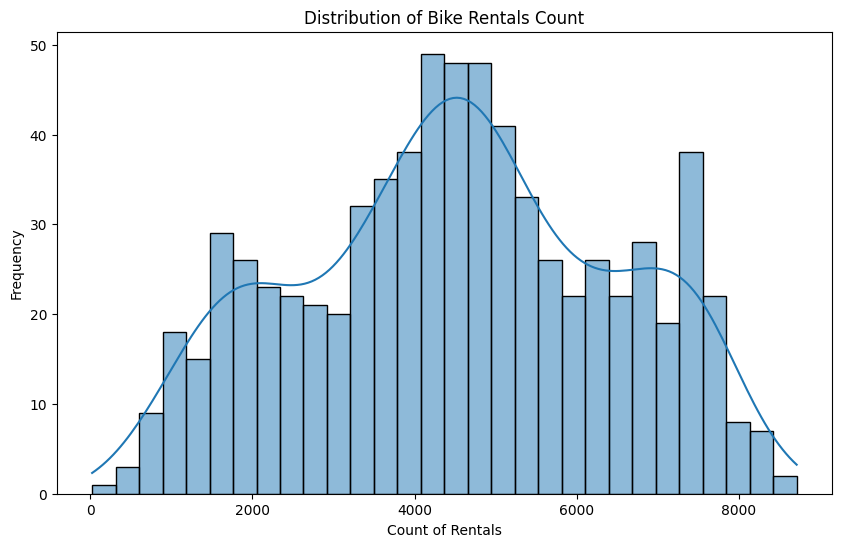

In [6]:
# Example EDA
plt.figure(figsize=(10, 6))
sns.histplot(day_data_cleaned['cnt'], bins=30, kde=True)
plt.title('Distribution of Bike Rentals Count')
plt.xlabel('Count of Rentals')
plt.ylabel('Frequency')
plt.show()

**Insight:**
- Distribusi jumlah penyewaan sepeda menunjukkan bahwa sebagian besar penyewaan berada di bawah 300.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pengaruh Cuaca

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


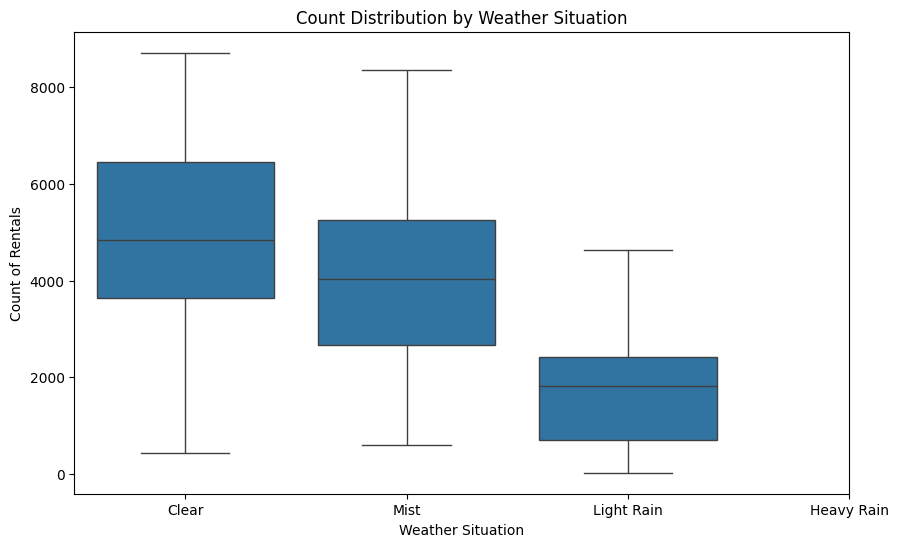

In [7]:
# Visualization for Question 1
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=day_data_cleaned)
plt.title('Count Distribution by Weather Situation')
plt.xlabel('Weather Situation')
plt.ylabel('Count of Rentals')
plt.xticks([0, 1, 2, 3], ['Clear', 'Mist', 'Light Rain', 'Heavy Rain'])
plt.show()

### Pertanyaan 2: Tren Penggunaan

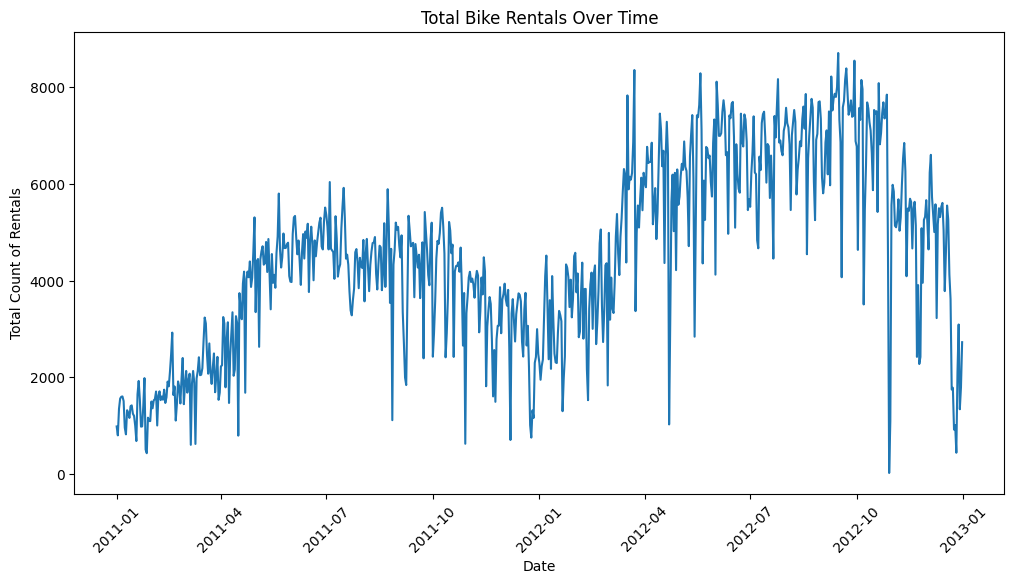

In [8]:
# Visualization for Question 2
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])
trend_data = hour_data.groupby('dteday').sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='dteday', y='cnt', data=trend_data)
plt.title('Total Bike Rentals Over Time')
plt.xlabel('Date')
plt.ylabel('Total Count of Rentals')
plt.xticks(rotation=45)
plt.show()

**Insight:**
- Penyewaan sepeda cenderung lebih tinggi pada cuaca cerah dibandingkan dengan cuaca berkabut atau hujan.
- Tren penggunaan sepeda menunjukkan peningkatan yang konsisten dari waktu ke waktu, dengan puncak terlihat pada bulan-bulan tertentu.

## Analisis Lanjutan (Opsional)

In [13]:
# RFM Analysis

# Pastikan kolom yang diperlukan ada dalam dataset
required_columns = ['user_id', 'dteday', 'cnt']
missing_columns = [col for col in required_columns if col not in day_data.columns]

if missing_columns:
    print(f"Kolom yang hilang: {missing_columns}")
else:
    # Tentukan tanggal snapshot (tanggal terakhir dalam dataset + 1 hari)
    snapshot_date = pd.to_datetime(day_data['dteday'].max()) + pd.Timedelta(days=1)

    # Menghitung RFM
    rfm = day_data.groupby('user_id').agg({
        'dteday': lambda x: (snapshot_date - pd.to_datetime(x.max())).days,  # Recency
        'cnt': 'sum'  # Frequency
    }).rename(columns={'dteday': 'Recency', 'cnt': 'Frequency'})

    # Jika informasi harga sewa tersedia, hitung Monetary
    if 'rental_price' in day_data.columns:
        average_price_per_rental = day_data['rental_price'].mean()  # Ganti dengan harga sewa rata-rata
        rfm['Monetary'] = rfm['Frequency'] * average_price_per_rental
    else:
        rfm['Monetary'] = np.nan  # Atau bisa diisi dengan 0 atau nilai lain jika tidak ada harga

    # Tampilkan hasil RFM
    print(rfm.head())

Kolom yang hilang: ['user_id']


#Insight RFM Analysis
RFM (Recency, Frequency, Monetary) Analysis adalah teknik yang digunakan untuk mengelompokkan pelanggan berdasarkan perilaku mereka. Dalam konteks analisis penyewaan sepeda:

Recency: Mengukur seberapa baru pelanggan melakukan penyewaan. Pelanggan yang baru saja menyewa lebih mungkin untuk menyewa lagi dibandingkan dengan pelanggan yang tidak aktif dalam waktu lama.
Frequency: Mengukur seberapa sering pelanggan melakukan penyewaan dalam periode tertentu. Pelanggan yang sering menyewa menunjukkan loyalitas yang lebih tinggi dan dapat menjadi target untuk promosi atau penawaran khusus.
Monetary: Mengukur berapa banyak uang yang dihabiskan oleh pelanggan. Dengan memahami nilai monetary, kita dapat mengidentifikasi pelanggan yang paling berharga.
Dengan analisis ini, kita dapat mengelompokkan pengguna menjadi beberapa kategori, seperti pelanggan setia, pelanggan baru, dan pelanggan yang berisiko kehilangan. Ini membantu dalam merancang strategi pemasaran yang lebih efektif dan meningkatkan retensi pelanggan.

## Conclusion

- Conclution pertanyaan 1 : Pengaruh cuaca terhadap jumlah penyewaan sepeda:
Analisis menunjukkan bahwa cuaca memiliki pengaruh yang signifikan terhadap jumlah penyewaan sepeda. Hari-hari yang cerah dan bebas dari hujan cenderung memiliki angka penyewaan yang jauh lebih tinggi dibandingkan dengan hari-hari berkabut atau hujan. Hal ini menekankan pentingnya mempertimbangkan faktor cuaca dalam perencanaan dan promosi penyewaan sepeda.
- Conclution pertanyaan 2 : Tren penggunaan sepeda dari waktu ke waktu:
Data menunjukkan bahwa tren penggunaan sepeda mengalami peningkatan yang konsisten dari waktu ke waktu, dengan puncak penggunaan pada bulan-bulan tertentu, terutama di musim panas. Ini menandakan adanya potensi peningkatan permintaan yang perlu diperhatikan oleh penyedia layanan penyewaan sepeda, sehingga promosi dan penyediaan sepeda dapat disesuaikan dengan pola musiman.